<a href="https://colab.research.google.com/github/bibekuchiha/EDA/blob/master/Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#importing datasets
healthcare = pd.read_csv("healthcare.csv")
healthcare.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


We’re going to focus on the ways in which hospitals charge patients for chest pain.

In [5]:
print(healthcare["DRG Definition"].unique())

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '069 - TRANSIENT ISCHEMIA'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '149 - DYSEQUILIBRIUM'
 '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '203 - BRONCHITIS & ASTHMA W/O CC/MCC'
 '207 - RESPIRAT

In [7]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']
chest_pain.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
80531,313 - CHEST PAIN,220108,MILTON HOSPITAL INC,199 REEDSDALE ROAD,MILTON,MA,2186,MA - Boston,43,6760.53,3547.00,2633.04
82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38
82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53
82207,313 - CHEST PAIN,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan,34,6417.20,2808.08,1872.38
82208,313 - CHEST PAIN,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,33,13311.78,2997.00,2113.84


#Separating By State

We now want to separate the dataset by state. Eventually, we’ll use a for loop to do this for every state, but for now, let’s prove to ourselves that we can make a boxplot for one state.


In [9]:
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == "AL"]
print(alabama_chest_pain)

         DRG Definition  ...  Average Medicare Payments
82205  313 - CHEST PAIN  ...                    2093.38
82206  313 - CHEST PAIN  ...                    1704.53
82207  313 - CHEST PAIN  ...                    1872.38
82208  313 - CHEST PAIN  ...                    2113.84
82209  313 - CHEST PAIN  ...                    2116.02
82210  313 - CHEST PAIN  ...                    2293.38
82211  313 - CHEST PAIN  ...                    2746.33
82212  313 - CHEST PAIN  ...                    2213.90
82213  313 - CHEST PAIN  ...                    2458.33
82214  313 - CHEST PAIN  ...                    2064.63
82215  313 - CHEST PAIN  ...                    3169.47
82216  313 - CHEST PAIN  ...                    2424.90
82217  313 - CHEST PAIN  ...                    1886.66
82218  313 - CHEST PAIN  ...                    2612.94
82219  313 - CHEST PAIN  ...                    1929.67
82220  313 - CHEST PAIN  ...                    2020.91
82221  313 - CHEST PAIN  ...                    

In [10]:
CO_chest_pain = chest_pain[chest_pain['Provider State'] == "CO"]
NewYork_chest_pain = chest_pain[chest_pain['Provider State'] == "NY"]

We now have all of the hospitals in Alabama that have a diagnosed chest pain. We now want to find the average cost of those diagnoses. These value is stored in the column ' Average Covered Charges '

In [11]:
costs = alabama_chest_pain[' Average Covered Charges '].values
print(costs)

[19540.55 20241.84  6417.2  13311.78 21375.25 12569.92 12072.04  9999.98
  7274.72  6660.36 15449.91  9091.22 20074.9  21093.72 39035.25 23769.85
  4868.25 18100.56  4308.61 23505.03 17560.85 10957.75  6935.45  7216.7
 14627.35  7006.38 24424.71  8700.78 12268.8  15938.66 11746.9  12790.15
  6131.62  9824.6  11883.65 13602.91 28750.57 13358.27  4610.73 13840.5
 14490.31 12698.   10512.09  7770.77 22905.23 33436.72 11779.69 20088.64
  9561.2  10494.45 14002.31 14100.38]


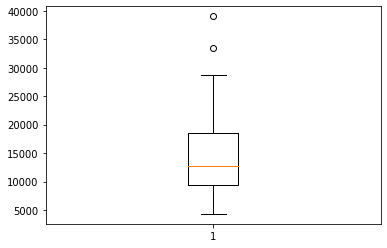

In [12]:
#Let’s now make a boxplot of those values! 
plt.boxplot(costs)
plt.show()

#Making a Boxplot for All States

In [14]:
states = chest_pain['Provider State'].unique()
print(states)

['MA' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']



We’ll now use a for loop to separate the dataset into a dataset for each state:

In [17]:
datasets = []
for state in states:
  datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)
print(datasets)  

[array([ 6760.53,  7263.36, 10160.13,  9814.26,  8508.57,  9237.1 ,
        7252.33,  8069.5 , 13453.9 ,  6461.63,  8949.04,  8405.25,
        8529.85,  7802.01,  6674.73,  7741.93,  8143.51, 15834.12,
        6982.15,  6306.77, 10944.32, 10062.22,  5614.52,  8582.21,
        6243.87, 10737.81,  8846.54,  6835.98, 20504.91,  6732.65,
        9519.28,  9277.05,  8860.04,  6994.6 , 10135.25,  9975.71,
        8569.26,  7055.11,  8875.3 , 11304.66, 10347.58,  4820.37,
       22368.11,  5640.84,  8774.95, 11465.08,  6713.43, 13827.62,
        8864.9 ,  8872.12,  7493.07,  7589.08]), array([19540.55, 20241.84,  6417.2 , 13311.78, 21375.25, 12569.92,
       12072.04,  9999.98,  7274.72,  6660.36, 15449.91,  9091.22,
       20074.9 , 21093.72, 39035.25, 23769.85,  4868.25, 18100.56,
        4308.61, 23505.03, 17560.85, 10957.75,  6935.45,  7216.7 ,
       14627.35,  7006.38, 24424.71,  8700.78, 12268.8 , 15938.66,
       11746.9 , 12790.15,  6131.62,  9824.6 , 11883.65, 13602.91,
       28750

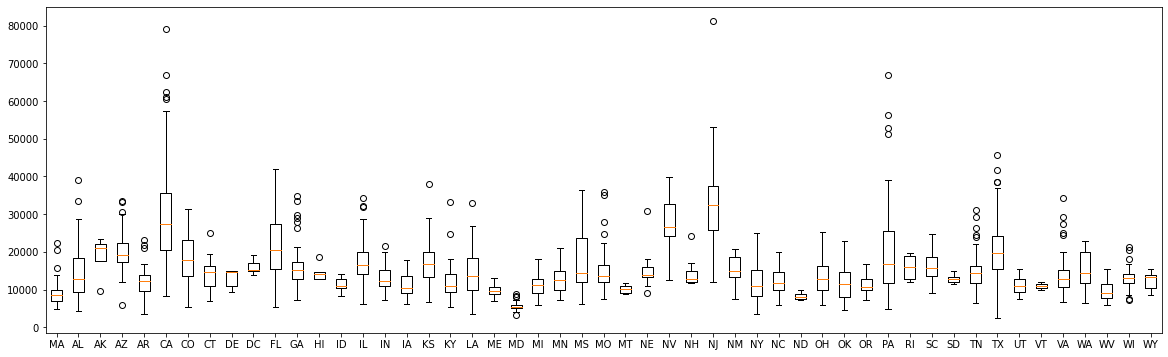

In [18]:
#We’re about to draw 50 boxplots
plt.figure(figsize=(20,6))
plt.boxplot(datasets, labels=states)
plt.show()

* If looks like California, New Jersey, and Florida have the largest spreads. Vermont has almost no spread.

* The state with the largest median cost for a chest pain diagnosis is New Jersey. The state with the smallest median cost is Maryland.

* California, Georgia, and Tennessee all have a fair number of outliers.

In [22]:
#We’re going to focus on the ways in which hospitals charge patients for HEART FAILURE & SHOCK.
Heart_failure_and_shock = healthcare[healthcare['DRG Definition'] == '292 - HEART FAILURE & SHOCK W CC']
Heart_failure_and_shock.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
55030,292 - HEART FAILURE & SHOCK W CC,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,CA,94574,CA - Napa,26,53579.19,9367.76,8805.46
55223,292 - HEART FAILURE & SHOCK W CC,50014,SUTTER AMADOR HOSPITAL,200 MISSION BLVD,JACKSON,CA,95642,CA - Sacramento,33,35138.90,8525.81,7707.39
55669,292 - HEART FAILURE & SHOCK W CC,60028,EXEMPLA SAINT JOSEPH HOSPITAL,1835 FRANKLIN ST,DENVER,CO,80218,CO - Denver,25,33084.32,6852.68,5644.16
56005,292 - HEART FAILURE & SHOCK W CC,60030,MCKEE MEDICAL CENTER,2000 BOISE AVE,LOVELAND,CO,80538,CO - Greeley,31,18665.12,5610.58,4788.93
56339,292 - HEART FAILURE & SHOCK W CC,70018,GREENWICH HOSPITAL ASSOCIATION,5 PERRYRIDGE RD,GREENWICH,CT,6830,CT - Bridgeport,86,27373.02,7422.93,6693.60


#We now want to separate the dataset by state. Eventually, we’ll use a for loop to do this for every state, but for now, let’s prove to ourselves that we can make a boxplot for one state.

In [24]:
alabama_heart_attack = Heart_failure_and_shock[Heart_failure_and_shock['Provider State'] == "AL"]
alabama_heart_attack.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
63035,292 - HEART FAILURE & SHOCK W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,229,23352.07,6045.81,4916.71
63036,292 - HEART FAILURE & SHOCK W CC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,54,14110.51,5824.51,5034.48
63037,292 - HEART FAILURE & SHOCK W CC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,112,21302.34,5400.99,4632.33
63038,292 - HEART FAILURE & SHOCK W CC,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan,13,8746.46,5233.84,4800.92
63039,292 - HEART FAILURE & SHOCK W CC,10009,HARTSELLE MEDICAL CENTER,201 PINE STREET NORTHWEST,HARTSELLE,AL,35640,AL - Birmingham,20,44265.70,5537.00,4975.80


In [ ]:
states = ['Provider State'].unique()
print(states)

In [25]:
costs = alabama_heart_attack[' Average Covered Charges '].values
print(costs)

[23352.07 14110.51 21302.34  8746.46 44265.7  11337.85 18117.9  23188.
  6745.07 28616.77 15485.83  8602.61 16876.45 20002.07 21978.67  8284.31
 10777.09 22285.68  9031.06 17605.14 16060.68 23631.22 23122.65 50466.55
 16446.08 40741.67  5312.73 28430.8  15375.85  4847.42 32063.71 30681.01
 17130.62 10842.37 11726.7   9399.05  9107.22  7646.36 10293.9   9807.33
 19519.52 11788.21 41402.94  8760.56 15872.95 25202.69 16002.39  7697.27
 19579.98  7736.25 16245.77 14870.02 24829.95 33734.74 19485.95 11834.14
  8390.48 20786.42 19449.96 18918.17 12364.   12050.66 13146.28 11942.69
 13740.55 32950.97 52660.62 14685.31  6969.5  20730.33 33406.39 21253.44
 24239.77 14481.81 23958.83 19459.69]


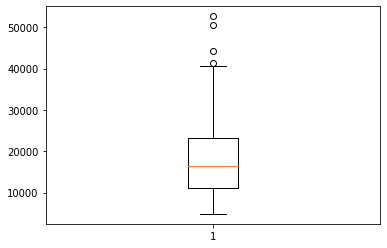

In [26]:
plt.boxplot(costs)
plt.show()

In [27]:
datasets1 = []
for state in states:
  datasets1.append(Heart_failure_and_shock[Heart_failure_and_shock['Provider State'] == state][' Average Covered Charges '].values)
print(datasets1)  

[array([14803.04, 11330.87, 12621.52, 11769.51, 14829.4 , 10647.03,
       11380.24, 14946.21, 12181.89, 12705.26, 11284.98,  9233.5 ,
       12554.14, 12888.78, 14111.69, 11506.32, 23547.01, 11785.64,
       11656.52, 14313.21, 12225.16, 12591.5 , 12951.42,  8288.27,
       14587.5 , 11184.71, 17407.01, 12515.8 , 10125.98, 37358.81,
        8704.36, 14871.91, 14733.78, 11427.91, 11711.97, 12437.2 ,
       12498.08, 14806.78, 14357.64,  9685.27, 14165.06, 12047.76,
       18306.94,  8561.  , 10960.26, 37079.63,  8237.78, 13883.03,
       18811.27,  8522.26,  8822.35, 21147.18,  9457.76, 12036.64,
       12060.34, 11248.74]), array([23352.07, 14110.51, 21302.34,  8746.46, 44265.7 , 11337.85,
       18117.9 , 23188.  ,  6745.07, 28616.77, 15485.83,  8602.61,
       16876.45, 20002.07, 21978.67,  8284.31, 10777.09, 22285.68,
        9031.06, 17605.14, 16060.68, 23631.22, 23122.65, 50466.55,
       16446.08, 40741.67,  5312.73, 28430.8 , 15375.85,  4847.42,
       32063.71, 30681.01, 17130

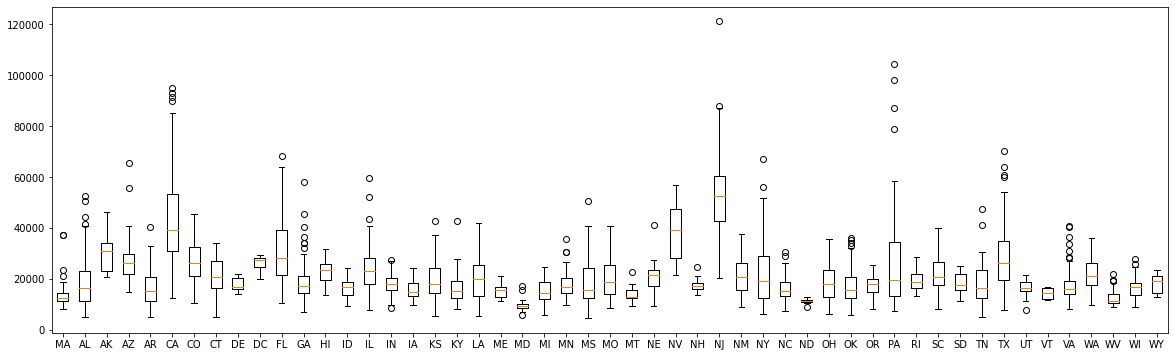

In [29]:
#We’re about to draw 50 boxplots
plt.figure(figsize=(20,6))
plt.boxplot(datasets1, labels=states)
plt.show()

* If looks like California, NV, and NewYork have the largest spreads. ND has almost no spread.

* The state with the largest median cost for a  is New Jersey. The state with the smallest median cost is Maryland.

* California, New jersey, and PA all have a fair number of outliers.
